In [1]:
!pip install gdown
!gdown --id 1z1J2JlhQ9NOFKY0fP_F49rXaxDQxn-22 --output /content/clothes_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1z1J2JlhQ9NOFKY0fP_F49rXaxDQxn-22
To: /content/clothes_dataset.zip
100% 261M/261M [00:01<00:00, 176MB/s]


In [2]:
import os
import zipfile
os.mkdir('/content/csv_data')

In [3]:
with zipfile.ZipFile('/content/clothes_dataset.zip', 'r') as existing_zip:
  # 원본 데이터셋을 압축 해제한 디렉터리 경로
    existing_zip.extractall('/content/csv_data/nocolorinfo')

In [4]:
from glob import glob
from PIL import Image
import numpy as np

folderList=glob('./csv_data/nocolorinfo/clothes_dataset/*')
X=[];y=[]

for folder in folderList:
    fileList=glob(folder + '/*')

    for file in fileList:
        img=Image.open(file)
        img=img.resize((100,100))
        imgarr=np.array(img)
        X.append(imgarr)
        y.append(folder)

In [5]:
print(np.shape(y))
print(np.shape(X))

(11385,)
(11385, 100, 100, 3)


In [6]:
np.shape(X[0])

(100, 100, 3)

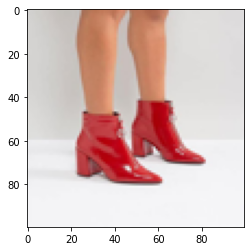

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X[5000])

In [8]:
y[5000]

'./csv_data/nocolorinfo/clothes_dataset/red_shoes'

In [9]:
y[5000].split('/')[4]

'red_shoes'

In [10]:
y1=[]; y2=[]
for x in y:
    tmp=x.split('/')[4]
    y1.append(tmp.split('_')[0])
    y2.append(tmp.split('_')[1])

In [11]:
print(y1[5000])
print(y2[5000])

red
shoes


In [12]:
# npz 파일 제작법
np.savez('./test.npz',X=X, Y1=y1, Y2=y2)